## Results of Host Prediction
### Dataset: EMBL mapping, Vertebrates, Non-IDV

**Models**: FNN, CNN, RNN, LSTM, TF

**Positional Embedding**: Sin-Cos

**Maximum Sequence Length**: 1036

**Classification**: Multi-class

**\# classes**: 5

**\# train samples** = 

**\# validation samples** = 

**\# test samples** = 

In [1]:
import seaborn

In [2]:
seaborn.__version__

'0.13.2'

In [3]:
import sys
import os
from pathlib import Path
sys.path.append(os.path.join(os.getcwd(), "..", "..", "..", "..", ".."))
sys.path.append(os.path.join(os.getcwd(), "..", "..", "..", ".."))
sys.path.append(os.path.join(os.getcwd(), "..", "..", ".."))
sys.path.append(os.path.join(os.getcwd(), "..", ".."))
sys.path

['/home/blessyantony/miniconda3/envs/zoonosis/lib/python311.zip',
 '/home/blessyantony/miniconda3/envs/zoonosis/lib/python3.11',
 '/home/blessyantony/miniconda3/envs/zoonosis/lib/python3.11/lib-dynload',
 '',
 '/home/blessyantony/miniconda3/envs/zoonosis/lib/python3.11/site-packages',
 '/home/blessyantony/dev/git/zoonosis/src/jupyter_notebooks/results-analysis/uniref90/../../../../..',
 '/home/blessyantony/dev/git/zoonosis/src/jupyter_notebooks/results-analysis/uniref90/../../../..',
 '/home/blessyantony/dev/git/zoonosis/src/jupyter_notebooks/results-analysis/uniref90/../../..',
 '/home/blessyantony/dev/git/zoonosis/src/jupyter_notebooks/results-analysis/uniref90/../..']

In [4]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
from scipy.stats import mannwhitneyu, wilcoxon, ranksums, iqr

from src.utils import utils, evaluation_utils, visualization_utils

In [5]:
output_filepaths = {
    "LR": os.path.join(os.getcwd(), "..","..", "..", "..","output/raw/uniref90_embl_vertebrates_non_idv_t0.01_c5_seq_len_in_99.9percentile/20240723/host_multi/kmer_k3_virus_host_name_multi__lr_output.csv"),
    "RF": os.path.join(os.getcwd(), "..","..", "..", "..", "output/raw/uniref90_embl_vertebrates_non_idv_t0.01_c5_seq_len_in_99.9percentile/20240723/host_multi/kmer_k3_virus_host_name_multi__rf_output.csv"),
    "SVM": os.path.join(os.getcwd(), "..","..", "..", "..", "output/raw/uniref90_embl_vertebrates_non_idv_t0.01_c5_seq_len_in_99.9percentile/20240723/host_multi/kmer_k3_virus_host_name_multi__svm_output.csv"),
    #"FNN": os.path.join(os.getcwd(), "..", "..", "..", "..", "output/raw/uniref90_embl_vertebrates_non_idv_t0.01_c5_seq_len_in_99.9percentile/20240717/host_multi/nlp_no_msl_fnn-l_10-d_1024-lr1e-3_output.csv"),
    "CNN": os.path.join(os.getcwd(), "..", "..", "..", "..", "output/raw/uniref90_embl_vertebrates_non_idv_t0.01_c5_seq_len_in_99.9percentile/20240717/host_multi/nlp_no_msl_cnn-l_4-d_1024-k3s1-lr1e-3_output.csv"),
    "RNN": os.path.join(os.getcwd(), "..", "..", "..", "..", "output/raw/uniref90_embl_vertebrates_non_idv_t0.01_c5_seq_len_in_99.9percentile/20240717/host_multi/nlp_no_msl_rnn-l_6-d_1024-lr1e-5_output.csv"),
    "LSTM": os.path.join(os.getcwd(), "..", "..", "..", "..", "output/raw/uniref90_embl_vertebrates_non_idv_t0.01_c5_seq_len_in_99.9percentile/20240722/host_multi/nlp_no_msl_lstm-l_2-d_1024-lr1e-3_output_mod.csv"),
    "ProtT5": os.path.join(os.getcwd(), "..", "..", "..", "..", "output/raw/uniref90_embl_vertebrates_non_idv_t0.01_c5_seq_len_in_99.9percentile/20250131/host_multi/external/uniref90viridae_prot_t5_xl_uniref50_msl2048_fnn_2l_d1024_lr3e-4_output.csv"),
    "ProstT5": os.path.join(os.getcwd(), "..", "..", "..", "..", "output/raw/uniref90_embl_vertebrates_non_idv_t0.01_c5_seq_len_in_99.9percentile/20241127/host_multi/external/uniref90viridae_prostt5_msl2048_bn_fnn_2l_d1024_lr3e-4_output.csv"),
    #"ESM2-t36_3B_UR50D" : os.path.join(os.getcwd(), "..", "..", "..", "..", "output/raw/uniref90_embl_vertebrates_non_idv_t0.01_c5_seq_len_in_99.9percentile/20241127/host_multi/external/uniref90viridae_esm2_t36_3B_UR50D_bn_fnn_2l_d1024_lr1e-4_output.csv"),
    "ESM3": os.path.join(os.getcwd(), "..", "..", "..", "..", "output/raw/uniref90_embl_vertebrates_non_idv_t0.01_c5_seq_len_in_99.9percentile/20241127/host_multi/external/uniref90viridae_esm3_bn_fnn_2l_d1024_lr1e-4_output.csv"),
    #"ESM2": os.path.join(os.getcwd(), "..", "..", "..", "..", "output/raw/uniref90_embl_vertebrates_non_idv/20241124/host_multi/external/uniref90viridae_esm2_msl2048_bn_fnn_2l_d1024_lr1e-4_output.csv"),
    #"Transformer-Encoder": os.path.join(os.getcwd(), "..","..", "..", "..", "output/raw/uniref90_embl_vertebrates_non_idv_t0.01_c5_seq_len_in_99.9percentile/20240717/host_multi/nlp_no_msl_transformer-l_6-h_8-d_1024-msl2048-lr1e-4_output.csv"),
    #"ProteinBERT": os.path.join(os.getcwd(), "..","..", "..", "..", "output/raw/uniref90_embl_vertebrates_non_idv_t0.01_c5_seq_len_in_99.9percentile/20240827/proteinbert_prediction_results_20240827_231839.csv"),
    #"VirProBERT": os.path.join(os.getcwd(), "..","..", "..", "..", "output/raw/uniref90_embl_vertebrates_non_idv_t0.01_c5_seq_len_in_99.9percentile/20240826/host_multi/fine_tuning_hybrid_cls/mlm_tfenc_l6_h8_lr1e-4_uniref90viridae_hybrid_attention_msl256s64ae_bn_fnn_2l_d1024_lr1e-4_output.csv")
    "HAVEN": os.path.join(os.getcwd(), "..","..", "..", "..", "output/raw/uniref90_embl_vertebrates_non_idv_t0.01_c5_seq_len_in_99.9percentile/20240826/host_multi/fine_tuning_hybrid_cls/mlm_tfenc_l6_h8_lr1e-4_uniref90viridae_hybrid_attention_msl256s64ae_bn_fnn_2l_d1024_lr1e-4_output.csv")
    
}

In [6]:
def classwise_auprc_analysis(output_filepaths, figure_output_filepath=None):
    itr_col = "itr"
    experiment_col = "experiment"
    y_true_col = "y_true"
    auprc_results = []
    for model, output_filepath in output_filepaths.items():
        df = pd.read_csv(output_filepath, index_col=0)
        print(f"Read output {model} = {df.shape}")
        
        cols = df.columns
        classes = list(set(cols) - set([itr_col, experiment_col, y_true_col]))
        itrs = df[itr_col].unique()
    
        for itr in itrs:
            df_itr = df[df[itr_col] == itr]
            _, auprcs_df = evaluation_utils.compute_class_auprc(df_itr, y_pred_columns=classes, y_true_col=y_true_col)
            auprcs_df["model"] = model
            auprcs_df["itr"] = itr
            auprc_results.append(auprcs_df)
    metadata = utils.compute_class_distribution(df_itr, y_true_col, format=False)
    metadata_formatted = utils.compute_class_distribution(df_itr, y_true_col, format=True)
    metadata_sorted = {}
    for k, v in metadata.items():
        metadata_sorted[metadata_formatted[k]] = v
    
    auprc_results_df = pd.concat(auprc_results, ignore_index=True)
    auprc_results_df.replace({"class":metadata_formatted}, inplace=True)
    sns.set_context("paper")
    sns.axes_style("whitegrid")
    
    FIGURE_CONFIG = {
        "figsize": (12, 6),
        "xtick.labelsize": 14,
        "ytick.labelsize": 14    
    }
    
    color_palette = sns.cubehelix_palette(start=3, rot=4.5, hue=1, gamma=0.9, dark=0.7, light=0.4, reverse=True, n_colors=auprc_results_df["model"].nunique())
    
    visualization_utils.pre_plot_config(FIGURE_CONFIG)
    ax = sns.boxplot(data=auprc_results_df, x="class", y="auprc", hue="model", 
                     order=metadata_sorted, linewidth=1.5, fliersize=5, linecolor="black",
                     palette=color_palette)
    
    bg_colors = [ "gray", "white",]
    
    plt.draw()
    
    ax.set_ylim(0, 1)
    ax.set_ylabel("AUPRC", size=14)
    ax.set_xlabel("", size=0, labelpad=0)
    sns.move_legend(ax, "lower center", bbox_to_anchor=(.5, 1), ncol=5, title=None, frameon=False)
    plt.setp(ax.get_legend().get_texts(), fontsize=14)
    visualization_utils.wrap_ticklabels(ax, axis="x")
    
    n_classes = auprc_results_df["class"].nunique()
    for i in range(n_classes):
        ax.axvspan(i - .5, i + .5, color=bg_colors[i%2], alpha=0.2)
    
    if figure_output_filepath:
        visualization_utils.view(figure_output_filepath)
    plt.show()

Read output LR = (31690, 7)
Read output RF = (31690, 7)
Read output SVM = (31690, 7)
Read output CNN = (15845, 7)
Read output RNN = (15845, 7)
Read output LSTM = (15845, 7)
Read output ProtT5 = (15845, 7)
Read output ProstT5 = (15845, 7)
Read output ESM3 = (15845, 7)
Read output HAVEN = (15845, 7)


/home/blessyantony/dev/git/zoonosis/src/jupyter_notebooks/results-analysis/uniref90/../../../../src/utils/visualization_utils.py:119: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(wrapped_labels, rotation=0)


<Figure size 640x480 with 0 Axes>

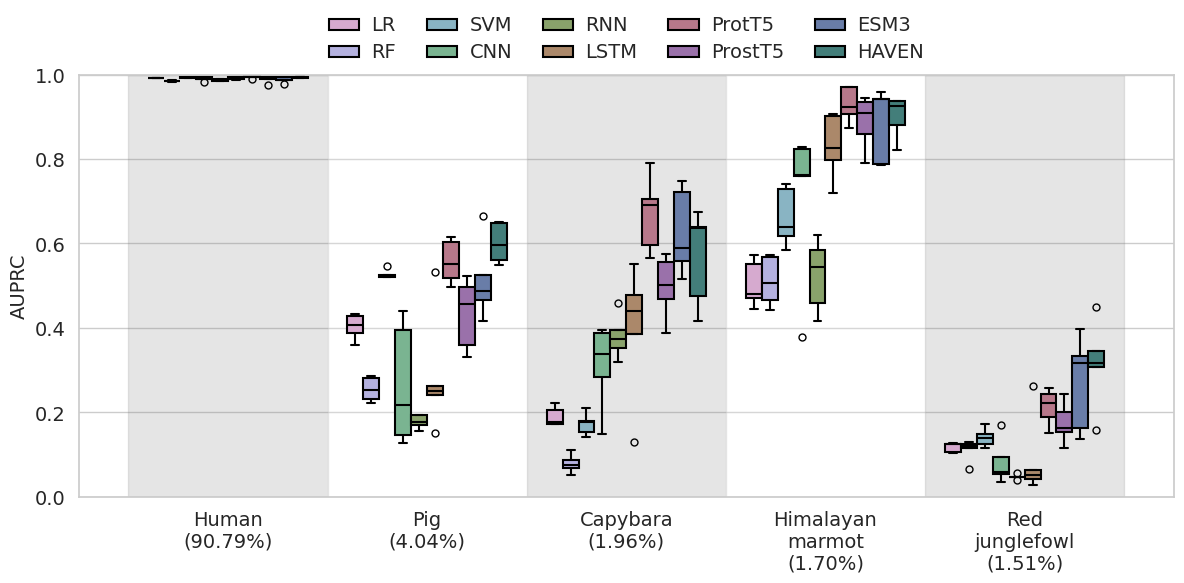

In [7]:
figure_output_filepath = os.path.join(os.getcwd(), "..","..", "..", "..", "output/visualization/haven/host_multi_all_models_classwise_aurpc_boxplot.pdf")
classwise_auprc_analysis(output_filepaths, figure_output_filepath)

In [14]:
def macro_and_classwise_auprc_analysis(output_filepaths, classes, figure_output_filepath=None):
    auprc_results = []
    classes = None
    itr_col = "itr"
    experiment_col = "experiment"
    y_true_col = "y_true"
    for model, output_filepath in output_filepaths.items():
        df = pd.read_csv(output_filepath, index_col=0)
        print(f"Read output {model} = {df.shape}")
        
        cols = df.columns
        classes = list(set(cols) - set([itr_col, experiment_col, y_true_col]))
        itrs = df[itr_col].unique()
    
        for itr in itrs:
            df_itr = df[df[itr_col] == itr]
            _, auprcs_df = evaluation_utils.compute_class_auprc(df_itr, y_pred_columns=classes, y_true_col=y_true_col)
            auprcs_df = pd.concat([auprcs_df, 
                                   pd.DataFrame({"class": ["Macro-AUPRC"], "auprc": [auprcs_df["auprc"].mean()]})
                                  ], ignore_index=True)
            auprcs_df["model"] = model
            auprcs_df["itr"] = itr
            auprc_results.append(auprcs_df)
    
    metadata = utils.compute_class_distribution(df_itr, y_true_col, format=False)
    metadata_formatted = utils.compute_class_distribution(df_itr, y_true_col, format=True)
    metadata_sorted = {}
    for k, v in metadata.items():
        metadata_sorted[metadata_formatted[k]] = v
    #metadata_sorted["Macro-AUPRC"] = 0
    auprc_results_df = pd.concat(auprc_results, ignore_index=True)
    auprc_results_df.replace({"class": metadata_formatted}, inplace=True)
    models = list(auprc_results_df["model"].unique())
    plt.rcParams['xtick.labelsize'] = 18
    plt.rcParams['ytick.labelsize'] = 18
    plt.rcParams.update({'font.size': 18})
    fig, axs = plt.subplots(1, 2, figsize=(18, 6), sharex=False, sharey=True, gridspec_kw={"width_ratios": [1, 3]})
    color_palette = sns.cubehelix_palette(start=3, rot=4.5, hue=1, gamma=0.9, dark=0.7, light=0.4, reverse=True, n_colors=auprc_results_df["model"].nunique())

    sns.boxplot(data=auprc_results_df[auprc_results_df["class"] == "Macro-AUPRC"], x="class", y="auprc", hue="model", fill=True,
                palette=color_palette, ax=axs[0],
                linewidth=1.5, fliersize=5, linecolor="black", legend=False)
    
    sns.boxplot(data=auprc_results_df[auprc_results_df["class"].isin(metadata_formatted.values())], x="class", y="auprc", hue="model", linewidth=1.5, fliersize=5, linecolor="black", order=metadata_sorted, palette=color_palette, ax=axs[1])
    #sns.violinplot(data=auprc_results_df[auprc_results_df["class"].isin(metadata_formatted.values())], x="class", y="auprc", hue="model", orient="v", order=metadata_sorted, palette=color_palette, ax=axs[1], legend="auto")
    # plt.draw()
    axs[0].set_ylim(0.0, 1)
    axs[1].set_ylim(0.0, 1)
    axs[0].set_ylabel("AUPRC", size=20)
    axs[0].set_xlabel("", size=0, labelpad=0)
    axs[1].set_xlabel("", size=0, labelpad=0)
    sns.move_legend(axs[1], "lower center", bbox_to_anchor=(.35, 1), ncol=5, title=None, frameon=False)
    plt.setp(axs[1].get_legend().get_texts(), fontsize=20)
    #visualization_utils.wrap_ticklabels(axs[0], axis="x")
    visualization_utils.wrap_ticklabels(axs[1], axis="x")

    bg_colors = [ "gray", "white",]
    
    for i in range(len(classes)):
        axs[1].axvspan(i - .5, i + .5, color=bg_colors[i%2], alpha=0.2)
    
    plt.subplots_adjust(wspace=0.01)
    plt.tight_layout()
    plt.savefig(figure_output_filepath, dpi=600)
    plt.subplots_adjust(wspace=-1.5)
    plt.show()
    return auprc_results_df

In [15]:
classes = ["Human", "Capybara", "Himalayan marmot", "Pig", "Red junglefowl"]
auprc_results_df = macro_and_classwise_auprc_analysis(output_filepaths, classes, 
                          figure_output_filepath=os.path.join(os.getcwd(), "..", "..", "..", "..", f"output/visualization/temp_new/host_multi_uniref90_combined_auprc.pdf"))

Read output LR = (31690, 7)


TypeError: missing a required argument: 'probas_pred'

In [18]:
auprc_results_df[["model", "class", "auprc"]].groupby(["model", "class"]).agg(["mean", "std", "median", iqr])

NameError: name 'auprc_results_df' is not defined

In [29]:
auprc_results_df[auprc_results_df["class"] == "Human (90.79%)"]["auprc"].median()

0.9910864506709303

In [74]:
pairs = [("VirProBERT", "ESM3"),
        ("VirProBERT", "ProstT5"),
         ("VirProBERT", "ProtT5"),
         ("VirProBERT", "LSTM"),
         ("VirProBERT", "RNN"),
         ("VirProBERT", "CNN")]

def get_p_value_annotation(p_value):
    if p_value > 5e-2 and p_value <= 1:
        return "ns"
    elif p_value > 1e-2 and p_value <= 5e-2:
        return "*"
    elif p_value > 1e-3 and p_value <= 1e-2:
        return "**"
    elif p_value > 1e-4 and p_value <= 1e-3:
        return "***"
    elif p_value <= 1e-4:
        return "****"
    else:
        return None

def combined_auprc_analysis_w_stat(output_filepaths, figure_output_filepath=None):
    itr_col = "itr"
    experiment_col = "experiment"
    y_true_col = "y_true"
    auprc_results = []
    for model, output_filepath in output_filepaths.items():
        df = pd.read_csv(output_filepath, index_col=0)
        print(f"Read output {model} = {df.shape}")
        
        cols = df.columns
        classes = list(set(cols) - set([itr_col, experiment_col, y_true_col]))
        itrs = df[itr_col].unique()
    
        for itr in itrs:
            df_itr = df[df[itr_col] == itr]
            _, auprcs_df = evaluation_utils.compute_class_auprc(df_itr, y_pred_columns=classes, y_true_col=y_true_col)
            auprcs_df = pd.concat([auprcs_df, 
                                   pd.DataFrame({"class": ["Macro-AUPRC"], "auprc": [auprcs_df["auprc"].mean()]})
                                  ], ignore_index=True)
            auprcs_df["model"] = model
            auprcs_df["itr"] = itr
            auprc_results.append(auprcs_df)
    
    metadata = utils.compute_class_distribution(df_itr, y_true_col, format=False)
    metadata_formatted = utils.compute_class_distribution(df_itr, y_true_col, format=True)
    metadata_sorted = {}
    for k, v in metadata.items():
        metadata_sorted[metadata_formatted[k]] = v
        
    #metadata_sorted["Macro-AUPRC"] = 0
    auprc_results_df = pd.concat(auprc_results, ignore_index=True)
    auprc_results_df.replace({"class": metadata_formatted}, inplace=True)
    models = list(auprc_results_df["model"].unique())
    print(models)
    auprc_results_df = pd.concat(auprc_results, ignore_index=True)
    auprc_results_df.replace({"class":metadata_formatted}, inplace=True)
    sns.set_context("paper")
    sns.axes_style("whitegrid")

    plt.rcParams['xtick.labelsize'] = 18
    plt.rcParams['ytick.labelsize'] = 18
    plt.rcParams.update({'font.size': 18})
    fig, axs = plt.subplots(2, 1, figsize=(14, 12))
    color_palette = sns.cubehelix_palette(start=3, rot=4.5, hue=1, gamma=0.9, dark=0.7, light=0.4, reverse=True, n_colors=auprc_results_df["model"].nunique())
    
    #visualization_utils.pre_plot_config(FIGURE_CONFIG)
    
    ############# First plot ###############
    sns.boxplot(data=auprc_results_df[auprc_results_df["class"] == "Macro-AUPRC"], x="model", y="auprc", hue="model", fill=True,
                palette=color_palette, ax=axs[0], order=models, legend=False,
                linewidth=1.5, fliersize=5, linecolor="black")
    sns.stripplot(data=auprc_results_df[auprc_results_df["class"] == "Macro-AUPRC"], x="model", y="auprc", ax=axs[0], color="black", size=8, alpha=.7,
                  order=models)


    for i, pair in enumerate(pairs):
        model_1_values = auprc_results_df[(auprc_results_df["class"] == "Macro-AUPRC") & (auprc_results_df["model"] == pair[0])]["auprc"].values
        model_2_values = auprc_results_df[(auprc_results_df["class"] == "Macro-AUPRC") & (auprc_results_df["model"] == pair[1])]["auprc"].values
        p_value = mannwhitneyu(model_1_values, model_2_values, alternative="two-sided").pvalue
        formatted_pvalue = f"p={p_value:.2e}"
        print(f"{pair}: p-value={formatted_pvalue}")
        
        x1 = models.index(pair[0])
        x2 = models.index(pair[1])
        y1 = max(model_1_values.max(), model_2_values.max()) + (0.06 * (i + 1))
        y2 = y1 + .01
        
        axs[0].plot([x1, x1, x2, x2], [y1, y2, y2, y1], lw=2, c="k")
        text = get_p_value_annotation(p_value)
        if text == "ns":
            axs[0].text((x1 + x2)*.5, y1+0.01, text , ha='center', va='bottom', color="k", size="18")
        else:
            axs[0].text((x1 + x2)*.5, y1, text, ha='center', va='bottom', color="k", size="18")

    
    axs[0].set_xlabel("", size=0, labelpad=0)
    axs[0].set_ylabel("Macro-AUPRC", size=20)
    axs[0].set_ylim(0, 1.1)

    ############# Second plot ###############
    sns.boxplot(data=auprc_results_df[auprc_results_df["class"].isin(metadata_formatted.values())], x="class", y="auprc", hue="model", 
                     order=metadata_formatted.values(), linewidth=1.5, fliersize=5, linecolor="black",
                     palette=color_palette, ax=axs[1])
    
    bg_colors = [ "gray", "white",]
        
    axs[1].set_ylim(0, 1)
    axs[1].set_ylabel("AUPRC", size=20)
    axs[1].set_xlabel("", size=0, labelpad=0)
    sns.move_legend(axs[1], "lower center", bbox_to_anchor=(.5, 1), ncol=5, title=None, frameon=False)
    plt.setp(axs[1].get_legend().get_texts(), fontsize=18)
    visualization_utils.wrap_ticklabels(axs[1], axis="x")
    
    n_classes = auprc_results_df["class"].nunique() - 1 # -1 to account for Macro-AUPRC
    for i in range(n_classes):
        axs[1].axvspan(i - .5, i + .5, color=bg_colors[i%2], alpha=0.2)

    axs[0].text(x=-1.5, y=1.1, s="A", fontsize=24, color="black")
    axs[1].text(x=-1.1, y=1.1, s="B", fontsize=24, color="black")
    axs[0].margins(0.01, tight=True)
    axs[1].margins(0.01, tight=True)
    if figure_output_filepath:
        plt.savefig(figure_output_filepath, bbox_inches="tight")
    plt.show()

Read output LR = (31690, 7)
Read output RF = (31690, 7)
Read output SVM = (31690, 7)
Read output CNN = (15845, 7)
Read output RNN = (15845, 7)
Read output LSTM = (15845, 7)
Read output ProtT5 = (15845, 7)
Read output ProstT5 = (15845, 7)
Read output ESM3 = (15845, 7)
Read output VirProBERT = (15845, 7)
['LR', 'RF', 'SVM', 'CNN', 'RNN', 'LSTM', 'ProtT5', 'ProstT5', 'ESM3', 'VirProBERT']
('VirProBERT', 'ESM3'): p-value=p=5.48e-01
('VirProBERT', 'ProstT5'): p-value=p=7.94e-03
('VirProBERT', 'ProtT5'): p-value=p=1.00e+00
('VirProBERT', 'LSTM'): p-value=p=7.94e-03
('VirProBERT', 'RNN'): p-value=p=7.94e-03
('VirProBERT', 'CNN'): p-value=p=7.94e-03


/home/blessyantony/dev/git/zoonosis/src/jupyter_notebooks/results-analysis/uniref90/../../../../src/utils/visualization_utils.py:119: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(wrapped_labels, rotation=0)


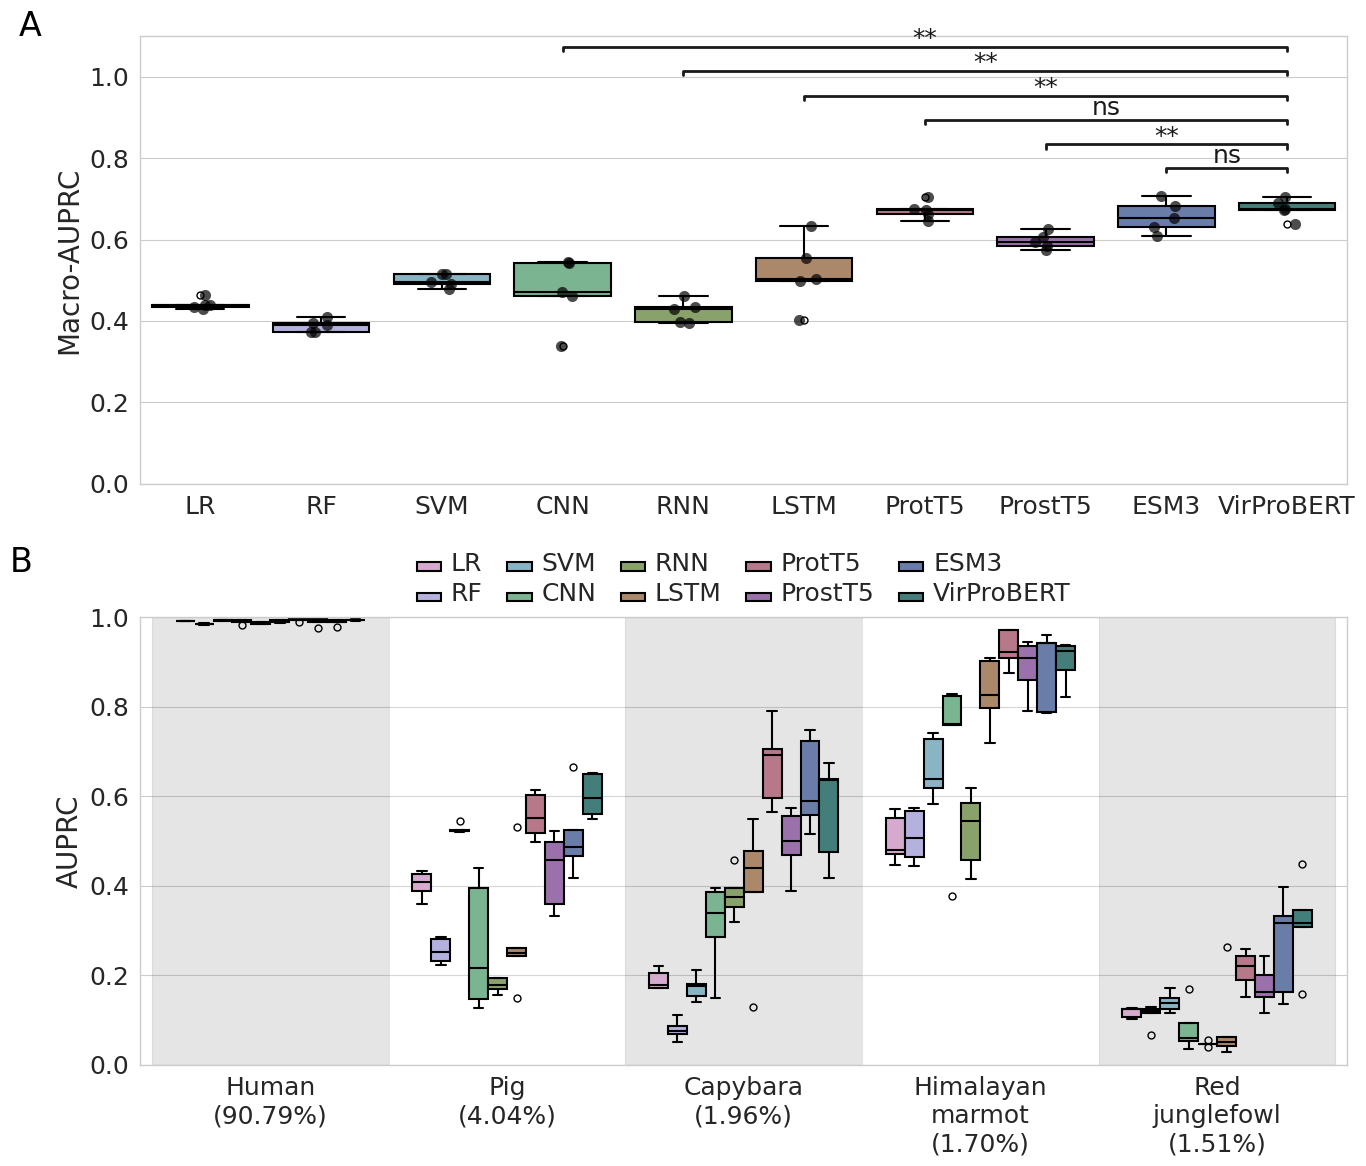

In [75]:
figure_output_filepath = os.path.join(os.getcwd(), "..","..", "..", "..", "output/visualization/temp_new/host_multi_all_models_combined_aurpc_boxplot_w_stat.pdf")
combined_auprc_analysis_w_stat(output_filepaths, figure_output_filepath=figure_output_filepath)

In [29]:
metadata_formatted

NameError: name 'metadata_formatted' is not defined